In [1]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
openc

In [1]:
import gensim.downloader as api

print("Downloading the model... This may take a while.")
model = api.load("word2vec-google-news-300")
print("Model downloaded successfully!")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model downloaded successfully!


In [2]:
# Pick 5 words of your choice
my_words = ["cat", "computer", "ocean", "happiness", "doctor"]

print("\n--- Similar Words ---")
for word in my_words:
    if word in model.key_to_index:
        print(f"\nWords similar to '{word}':")
        try:
            similar_words = model.most_similar(word, topn=5)
            for sim_word, similarity in similar_words:
                print(f"  - {sim_word}: {similarity:.4f}")
        except KeyError:
            print(f"  '{word}' not found in the vocabulary.")
    else:
        print(f"\n'{word}' not found in the model's vocabulary.")


--- Similar Words ---

Words similar to 'cat':
  - cats: 0.8099
  - dog: 0.7609
  - kitten: 0.7465
  - feline: 0.7326
  - beagle: 0.7151

Words similar to 'computer':
  - computers: 0.7979
  - laptop: 0.6640
  - laptop_computer: 0.6549
  - Computer: 0.6473
  - com_puter: 0.6082

Words similar to 'ocean':
  - sea: 0.7644
  - oceans: 0.7483
  - Pacific_Ocean: 0.7037
  - Atlantic_Ocean: 0.6659
  - oceanic: 0.6610

Words similar to 'happiness':
  - contentment: 0.7695
  - joy: 0.6183
  - Happiness: 0.6116
  - hapiness: 0.5749
  - contentedness: 0.5575

Words similar to 'doctor':
  - physician: 0.7806
  - doctors: 0.7477
  - gynecologist: 0.6948
  - surgeon: 0.6793
  - dentist: 0.6785


In [3]:
print("\n--- Analogy Examples ---")

# Example 1: Gender analogy
# king - man + woman = queen
try:
    result_1 = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
    print(f"\nKing - Man + Woman = {result_1[0][0]} (similarity: {result_1[0][1]:.4f})")
except KeyError as e:
    print(f"\nError in Example 1: {e}. Make sure all words exist in the vocabulary.")

# Example 2: Capital City analogy
# Paris - France + Italy = Rome
try:
    result_2 = model.most_similar(positive=['Paris', 'Italy'], negative=['France'], topn=1)
    print(f"\nParis - France + Italy = {result_2[0][0]} (similarity: {result_2[0][1]:.4f})")
except KeyError as e:
    print(f"\nError in Example 2: {e}. Make sure all words exist in the vocabulary.")

# Example 3: Verb Tense analogy
# walked - walking + singing = sang (This one can be a bit trickier and less consistent)
try:
    result_3 = model.most_similar(positive=['walked', 'singing'], negative=['walking'], topn=1)
    print(f"\nWalked - Walking + Singing = {result_3[0][0]} (similarity: {result_3[0][1]:.4f})")
except KeyError as e:
    print(f"\nError in Example 3: {e}. Make sure all words exist in the vocabulary.")


--- Analogy Examples ---

King - Man + Woman = queen (similarity: 0.7118)

Paris - France + Italy = Milan (similarity: 0.7222)

Walked - Walking + Singing = sang (similarity: 0.7862)


In [4]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec, FastText
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

--- 1. DATA LOADING AND EDA ---

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

Head of the dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


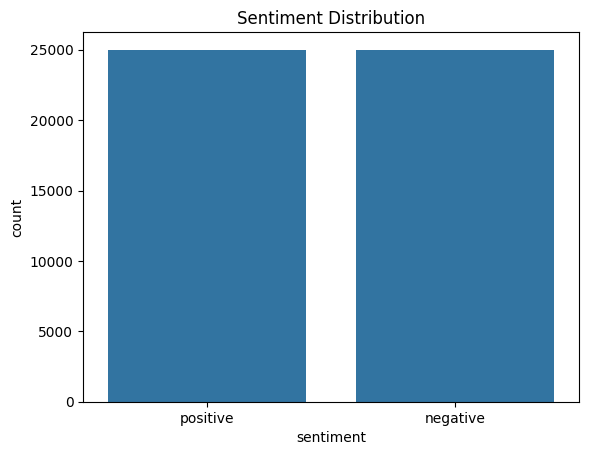


Review Length Statistics:
count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


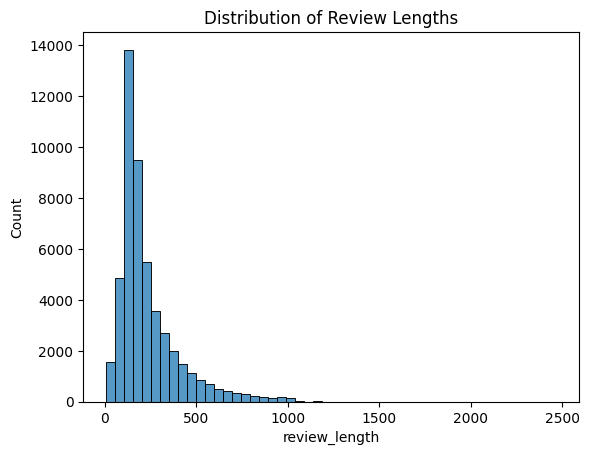

In [6]:

# ==============================================================================
# 1. DATA LOADING AND EDA
# ==============================================================================

print("--- 1. DATA LOADING AND EDA ---")
# Load the dataset
df = pd.read_csv('/content/IMDB Dataset.csv')

# Display basic information
print("\nDataFrame Info:")
df.info()

# Display the first few rows
print("\nHead of the dataset:")
print(df.head())

# Check sentiment distribution
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Map sentiment labels to numerical values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Analyze review length
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
print("\nReview Length Statistics:")
print(df['review_length'].describe())
sns.histplot(df['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.show()


In [12]:
import nltk
nltk.download('punkt_tab')

# ==============================================================================
# 2. TEXT CLEANING AND PREPROCESSING
# ==============================================================================

print("\n--- 2. TEXT CLEANING AND PREPROCESSING ---")
# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans the input text by:
    1. Removing HTML tags
    2. Removing non-alphabetic characters and digits
    3. Converting to lowercase
    4. Tokenizing the text
    5. Removing stopwords
    6. Joining the tokens back into a string
    """
    # 1. Remove HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    # 2. Remove non-alphabetic characters and digits, and lowercase
    clean_text = re.sub(r'[^a-zA-Z]', ' ', clean_text).lower()
    # 3. Tokenize
    tokens = word_tokenize(clean_text)
    # 4. Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    return filtered_tokens

# # Apply the cleaning function to the reviews
print("Cleaning and tokenizing reviews...")
df['clean_review'] = df['review'].apply(clean_text)
print("Cleaning complete.")
print("\nFirst cleaned review:")
print(df['clean_review'].iloc[0])




--- 2. TEXT CLEANING AND PREPROCESSING ---
Cleaning and tokenizing reviews...
Cleaning complete.

First cleaned review:
['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', 'aryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact

In [13]:

# ==============================================================================
# 3. WORD VECTORIZATION & MODEL TRAINING
# ==============================================================================

# Helper function to create document vectors by averaging word vectors
def document_vector(model, doc):
    """
    Creates a document vector by averaging the word vectors of all words in the document.
    Handles words not in the model's vocabulary by skipping them.
    """
    # Filter out words not in the model's vocabulary
    doc = [word for word in doc if word in model.index_to_key]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model[doc], axis=0)


# Split the data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    df['clean_review'], df['sentiment'], test_size=0.2, random_state=42
)

# Initialize a dictionary to store model results
results = {}

def train_and_evaluate(X_train, X_test, y_train, y_test, model_name):
    """
    Trains a Logistic Regression model and evaluates its performance.
    """
    print(f"\n--- Training with {model_name} vectors ---")

    # Check if there are any non-zero vectors in the training data
    if not np.any(np.sum(X_train, axis=1)):
        print(f"Warning: All vectors for {model_name} are zero. Skipping model training.")
        return {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1_score': 0}

    # Train a Logistic Regression model
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    lr_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = lr_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

# --- A. Pre-trained Word2Vec (Google News) ---
# NOTE: This part requires downloading a large file.
# You can skip this part to run the code quickly or
# download the model from: https://code.google.com/archive/p/word2vec/
# and place the file 'GoogleNews-vectors-negative300.bin' in the project directory.

try:
    print("\n--- A. Pre-trained Word2Vec Model ---")
    from gensim.models import KeyedVectors
    pretrained_model_path = 'GoogleNews-vectors-negative300.bin'
    pretrained_w2v = KeyedVectors.load_word2vec_format(pretrained_model_path, binary=True)

    print("Converting reviews to vectors using pre-trained Word2Vec...")
    X_train_w2v = np.array([document_vector(pretrained_w2v, doc) for doc in X_train_raw])
    X_test_w2v = np.array([document_vector(pretrained_w2v, doc) for doc in X_test_raw])

    results['Pre-trained W2V'] = train_and_evaluate(X_train_w2v, X_test_w2v, y_train, y_test, "Pre-trained Word2Vec")

except FileNotFoundError:
    print("Pre-trained Word2Vec model file not found. Skipping this step.")
    results['Pre-trained W2V'] = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1_score': 0}


# --- B. Custom Skip-gram Word2Vec ---
print("\n--- B. Custom Skip-gram Word2Vec ---")
print("Training custom Skip-gram model...")
custom_skipgram_model = Word2Vec(
    sentences=X_train_raw, # Use cleaned tokens from training set
    sg=1,                  # 1 for Skip-gram
    vector_size=100,
    window=5,
    min_count=2,           # Min count 2 is a good practice for real data
    workers=4
)
custom_skipgram_wv = custom_skipgram_model.wv

print("Converting reviews to vectors using custom Skip-gram...")
X_train_sg = np.array([document_vector(custom_skipgram_wv, doc) for doc in X_train_raw])
X_test_sg = np.array([document_vector(custom_skipgram_wv, doc) for doc in X_test_raw])

results['Custom Skip-gram'] = train_and_evaluate(X_train_sg, X_test_sg, y_train, y_test, "Custom Skip-gram")


# --- C. Custom CBoW Word2Vec ---
print("\n--- C. Custom CBoW Word2Vec ---")
print("Training custom CBoW model...")
custom_cbow_model = Word2Vec(
    sentences=X_train_raw, # Use cleaned tokens from training set
    sg=0,                  # 0 for CBoW
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)
custom_cbow_wv = custom_cbow_model.wv

print("Converting reviews to vectors using custom CBoW...")
X_train_cbow = np.array([document_vector(custom_cbow_wv, doc) for doc in X_train_raw])
X_test_cbow = np.array([document_vector(custom_cbow_wv, doc) for doc in X_test_raw])

results['Custom CBoW'] = train_and_evaluate(X_train_cbow, X_test_cbow, y_train, y_test, "Custom CBoW")


# --- D. Custom FastText ---
print("\n--- D. Custom FastText ---")
print("Training custom FastText model...")
custom_fasttext_model = FastText(
    sentences=X_train_raw, # Use cleaned tokens from training set
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)
custom_fasttext_wv = custom_fasttext_model.wv

print("Converting reviews to vectors using custom FastText...")
X_train_ft = np.array([document_vector(custom_fasttext_wv, doc) for doc in X_train_raw])
X_test_ft = np.array([document_vector(custom_fasttext_wv, doc) for doc in X_test_raw])

results['Custom FastText'] = train_and_evaluate(X_train_ft, X_test_ft, y_train, y_test, "Custom FastText")


--- A. Pre-trained Word2Vec Model ---
Pre-trained Word2Vec model file not found. Skipping this step.

--- B. Custom Skip-gram Word2Vec ---
Training custom Skip-gram model...
Converting reviews to vectors using custom Skip-gram...

--- Training with Custom Skip-gram vectors ---
Accuracy: 0.8739
Precision: 0.8721
Recall: 0.8785
F1-Score: 0.8753

--- C. Custom CBoW Word2Vec ---
Training custom CBoW model...
Converting reviews to vectors using custom CBoW...

--- Training with Custom CBoW vectors ---
Accuracy: 0.8596
Precision: 0.8552
Recall: 0.8684
F1-Score: 0.8618

--- D. Custom FastText ---
Training custom FastText model...
Converting reviews to vectors using custom FastText...

--- Training with Custom FastText vectors ---
Accuracy: 0.8440
Precision: 0.8395
Recall: 0.8535
F1-Score: 0.8465



--- 4. TABULATING MODEL PERFORMANCE ---

Model Performance Summary:
                  accuracy  precision    recall  f1_score
Pre-trained W2V     0.0000   0.000000  0.000000  0.000000
Custom Skip-gram    0.8739   0.872143  0.878547  0.875334
Custom CBoW         0.8596   0.855189  0.868426  0.861757
Custom FastText     0.8440   0.839547  0.853542  0.846487


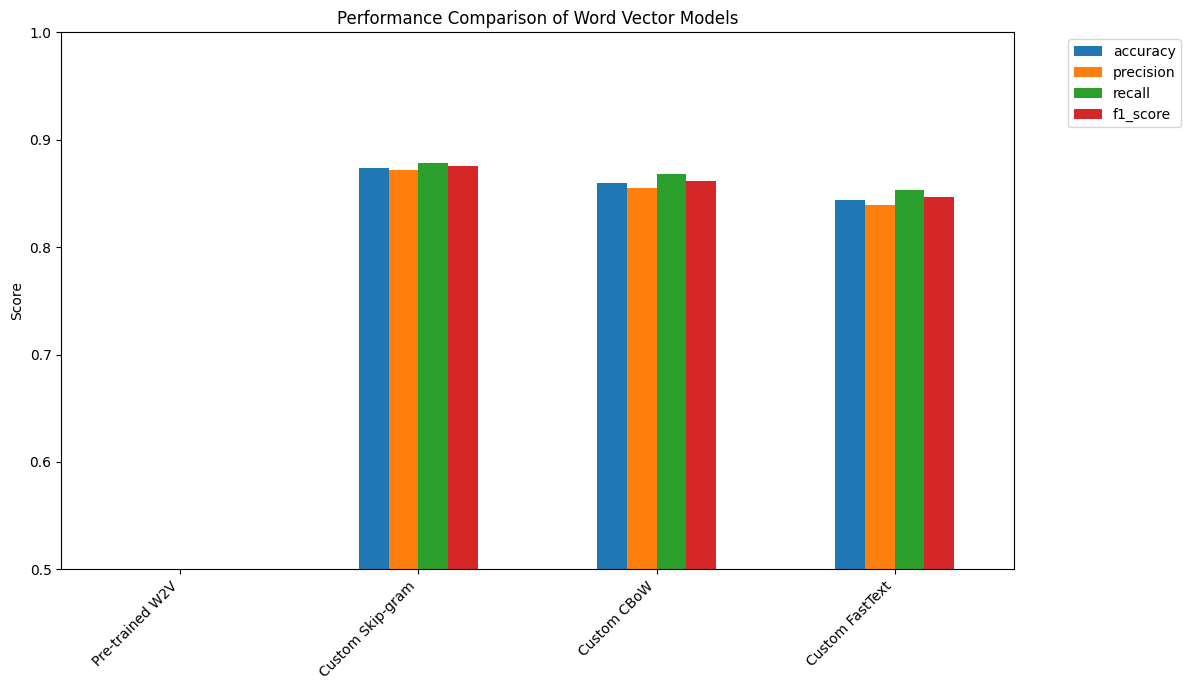


Final Tabulated Results with Comments:
                  accuracy  precision    recall  f1_score  \
Pre-trained W2V     0.0000   0.000000  0.000000  0.000000   
Custom Skip-gram    0.8739   0.872143  0.878547  0.875334   
Custom CBoW         0.8596   0.855189  0.868426  0.861757   
Custom FastText     0.8440   0.839547  0.853542  0.846487   

                                                           Comments  
Pre-trained W2V   Trained on a large generic corpus (Google News...  
Custom Skip-gram  Trained on our dataset, capturing specific rel...  
Custom CBoW       Trained on our dataset, focuses on context. Ge...  
Custom FastText   Trained on our dataset, handles out-of-vocabul...  


In [14]:
# ==============================================================================
# 4. TABULATE MODEL PERFORMANCE STATS
# ==============================================================================

print("\n--- 4. TABULATING MODEL PERFORMANCE ---")
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(results_df)

# Plot the results
results_df.plot(kind='bar', figsize=(12, 7))
plt.title('Performance Comparison of Word Vector Models')
plt.ylabel('Score')
plt.ylim(0.5, 1.0) # Set a reasonable y-axis range
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Optional: Add a comment column to the DataFrame ---
comments = {
    'Pre-trained W2V': 'Trained on a large generic corpus (Google News), might perform well but could miss domain-specific nuances.',
    'Custom Skip-gram': 'Trained on our dataset, capturing specific relationships within movie reviews. Good for semantic understanding.',
    'Custom CBoW': 'Trained on our dataset, focuses on context. Generally faster than Skip-gram.',
    'Custom FastText': 'Trained on our dataset, handles out-of-vocabulary words well due to character n-grams. Expected to be robust.'
}
results_df['Comments'] = results_df.index.map(comments)

print("\nFinal Tabulated Results with Comments:")
print(results_df)
